In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


🔎 Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   referencia                   122 non-null    object 
 1   periodo                      122 non-null    int64  
 2   pobreza                      122 non-null    int64  
 3   extrema_pobreza              122 non-null    int64  
 4   total                        122 non-null    int64  
 5   populacao_estimada           122 non-null    int64  
 6   porcentagem_pobreza          122 non-null    float64
 7   porcentagem_extrema_pobreza  122 non-null    float64
 8   porcentagem_vulnerabilidade  122 non-null    float64
 9   familias_pobreza             122 non-null    int64  
 10  familias_extrema_pobreza     122 non-null    int64  
 11  familias_vulnerabilidade     122 non-null    int64  
 12  indigenas_pobreza            122 non-null    int64  

/tmp/ipython-input-2-93628099.py:31: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


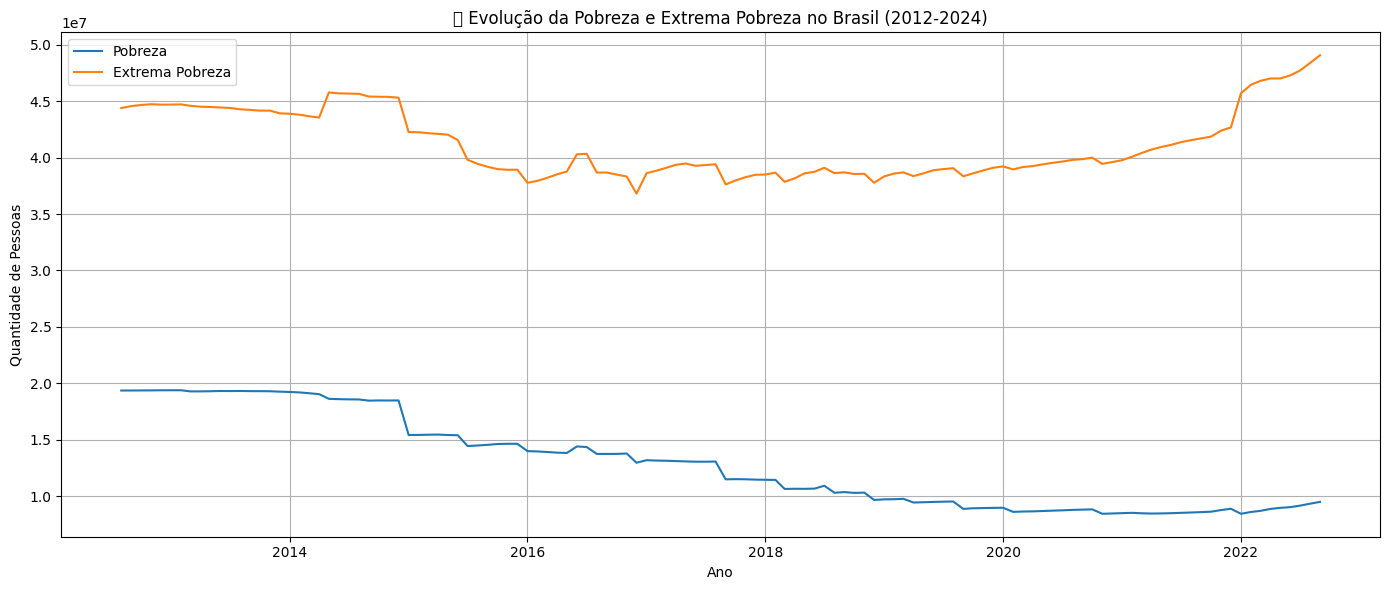

/tmp/ipython-input-2-93628099.py:44: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


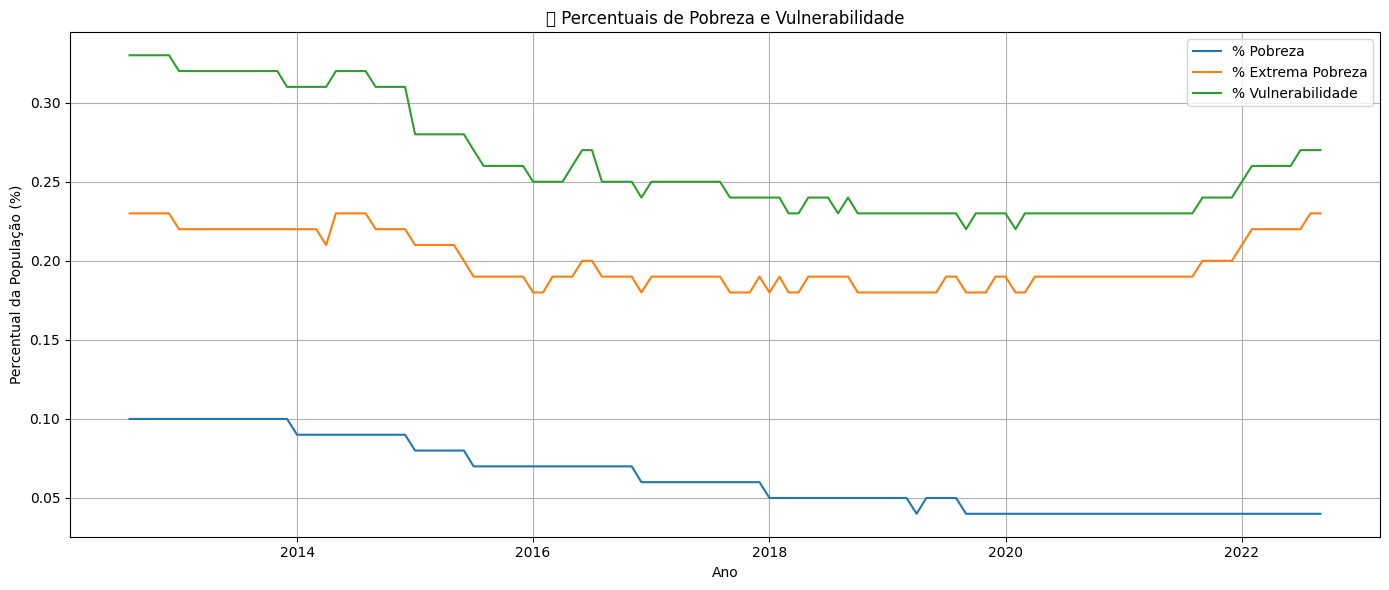

/tmp/ipython-input-2-93628099.py:51: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


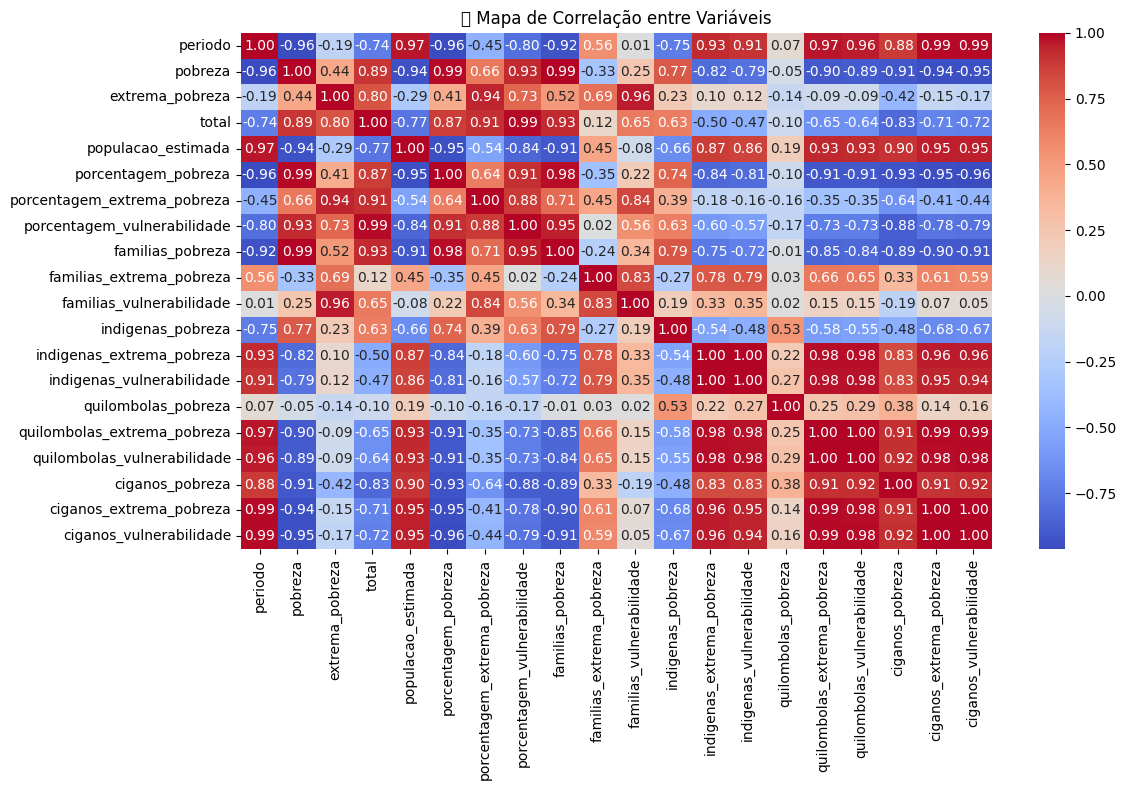

/tmp/ipython-input-2-93628099.py:64: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129485 (\N{STANDING PERSON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


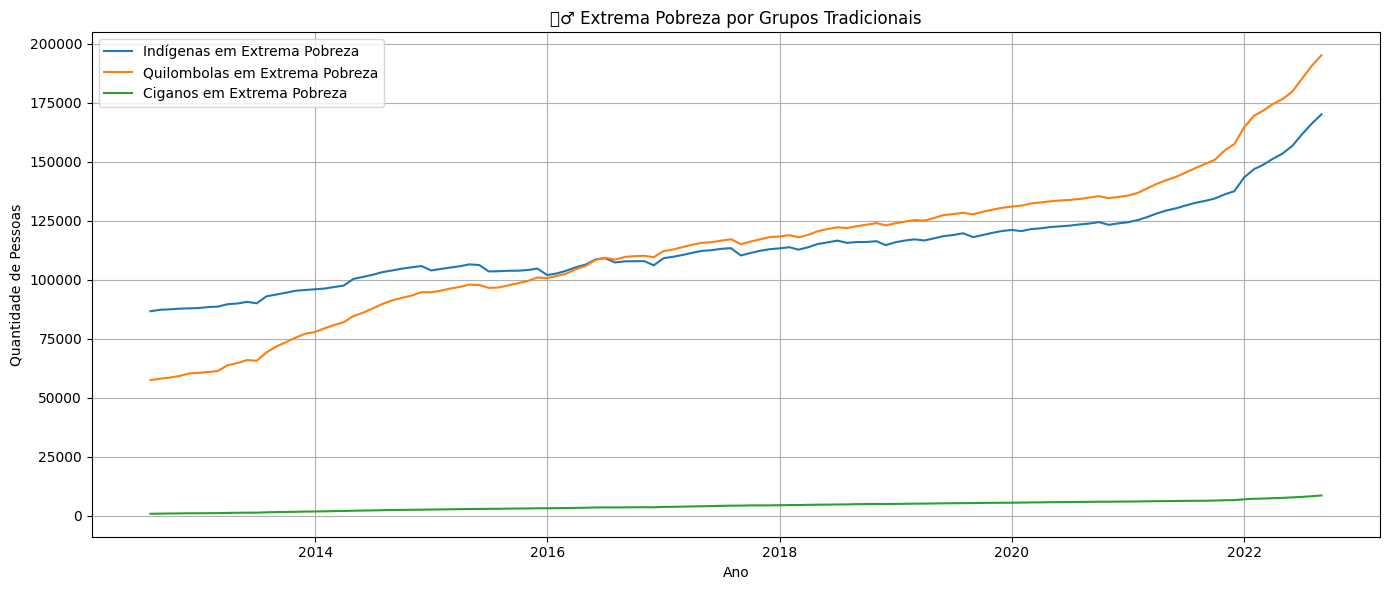

In [2]:
df = pd.read_csv('/content/indices_pobreza_consolidado.csv')

# Exibir primeiras linhas
df.head()

# 📊 2. Informações gerais
print("🔎 Informações do dataset:")
print(df.info())

print("\n📏 Estatísticas descritivas:")
print(df.describe())

# 🧽 3. Limpeza e pré-processamento
df['referencia'] = pd.to_datetime(df['referencia'], format='%m/%Y')
df = df.sort_values('referencia')

# Verificar valores ausentes
print("\n❓ Valores nulos:")
print(df.isnull().sum())

# 🧠 4. Análise descritiva - Evolução ao longo do tempo

plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='referencia', y='pobreza', label='Pobreza')
sns.lineplot(data=df, x='referencia', y='extrema_pobreza', label='Extrema Pobreza')
plt.title('📉 Evolução da Pobreza e Extrema Pobreza no Brasil (2012-2024)')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Pessoas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📈 5. Porcentagens de pobreza ao longo do tempo
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='referencia', y='porcentagem_pobreza', label='% Pobreza')
sns.lineplot(data=df, x='referencia', y='porcentagem_extrema_pobreza', label='% Extrema Pobreza')
sns.lineplot(data=df, x='referencia', y='porcentagem_vulnerabilidade', label='% Vulnerabilidade')
plt.title('📊 Percentuais de Pobreza e Vulnerabilidade')
plt.xlabel('Ano')
plt.ylabel('Percentual da População (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔍 6. Correlação entre variáveis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('📌 Mapa de Correlação entre Variáveis')
plt.tight_layout()
plt.show()

# 🎯 7. Grupos sociais específicos (ex: indígenas)
plt.figure(figsize=(14, 6))
sns.lineplot(data=df, x='referencia', y='indigenas_extrema_pobreza', label='Indígenas em Extrema Pobreza')
sns.lineplot(data=df, x='referencia', y='quilombolas_extrema_pobreza', label='Quilombolas em Extrema Pobreza')
sns.lineplot(data=df, x='referencia', y='ciganos_extrema_pobreza', label='Ciganos em Extrema Pobreza')
plt.title('🧍‍♂️ Extrema Pobreza por Grupos Tradicionais')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Pessoas')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()